# Patagonia Python Meetup | Introducción a <img src="logo.png" width="100">

Importante: 
- las funciones de nilearn que procesan datos de neuroimagen aceptan NiftiImage como objeto
- nilearn no tiene una interfaz gráfica de usuario, se usa interactivamente en IPython o de forma automatizada mediante código Python. 

### Ejemplo 1: 
Visualizar una imagen guardada en el archivo Nifti "001.nii" en el directorio /ejemplo_nifti/

1) Importar la funcionalidad de trazado por:

In [2]:
from nilearn import plotting

2) Llamar a la función que crea un "cerebro de vidrio" dándole el nombre de archivo:

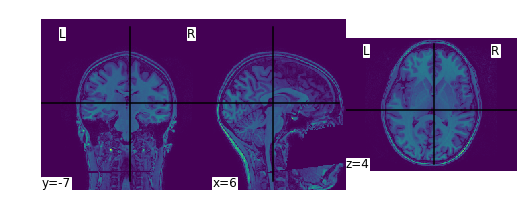

In [3]:
img = 'ejemplo_nifti/mprage_anonymized.nii'
plotting.plot_img(img)

Operaciones simples de manipulación de imágenes: módulo nilearn.image 

Ejemplo: smoothing

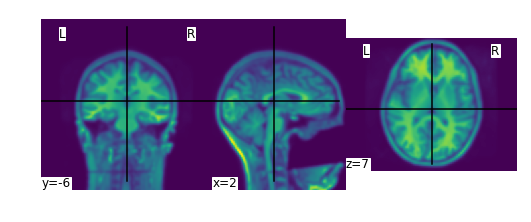

In [4]:
from nilearn import image
smoothed = image.smooth_img(img, fwhm=5) 
plotting.plot_img(smoothed)

El valor devuelto es un objeto NiftiImage. Se puede pasar a otras funciones nilearn que operan en niimgs (neuroimagenes), guardarse, etc...

In [5]:
smoothed.to_filename("ejemplo_nifti/smoothed.nii")   
print(smoothed)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 200, 256)
affine: 
[[  -1.           -0.           -0.          129.43807983]
 [  -0.            1.00000191   -0.          -98.41231537]
 [   0.            0.            1.         -124.6697998 ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 200 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         1.         1.0000019  1.         0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 1518.4393
cal_

-

nilearn trata con imágenes de Nifti que vienen en dos formatos: 
- imágenes 3D, que representan un volumen cerebral
- imágenes 4D, que representan una serie de volúmenes cerebrales

### Ejemplo 2:

Extraer imagen 3D de un Nifti 4D usando la función image.index_img 
Nota: tener en cuenta que la indexación de la matriz siempre comienza en 0

1) Importar dataset de nilearn

In [6]:
from nilearn import datasets

rsn = datasets.fetch_atlas_smith_2009()['rsn10']
print(rsn)

/home/aletrujim/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz


rsn es una red de estado de reposo del estudio 'Smith 2009' sobre la correspondencia entre descanso y tarea.

rsn es una img Nifti 4D:

In [7]:
print(image.load_img(rsn).shape)

(91, 109, 91, 10)


2) Extraer imagen 3D:

Para este caso usamos la primera (index 0) y el resultado de first_rsn es una img nifti 3D:

In [8]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


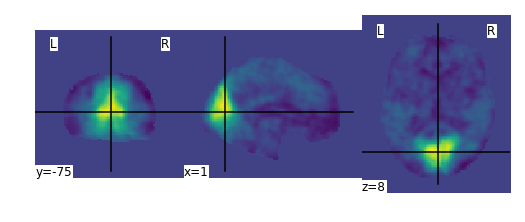

In [9]:
plotting.plot_img(first_rsn)

Si queremos trazar todos los volúmenes en este archivo 4D, podemos usar iter_img para reproducirlos en bucle.

plot_glass_brain Traza proyecciones 2d de una imagen de ROI/máscara (por defecto 3 proyecciones: Frontal, Axial y Lateral). Los esquemas de cristal cerebral se agregan en la parte superior de la imagen.

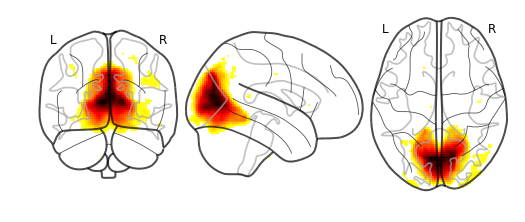

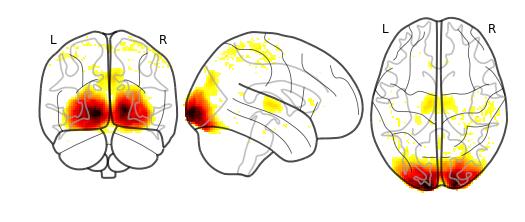

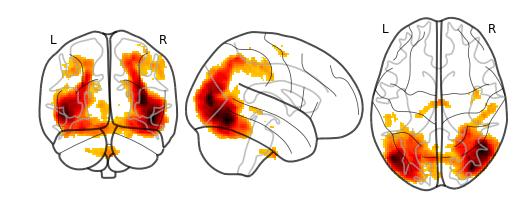

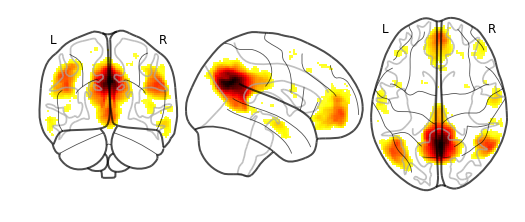

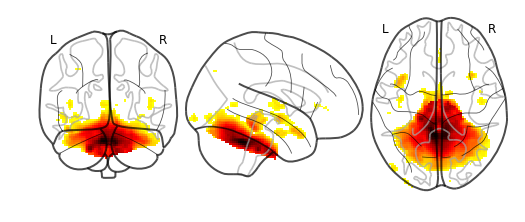

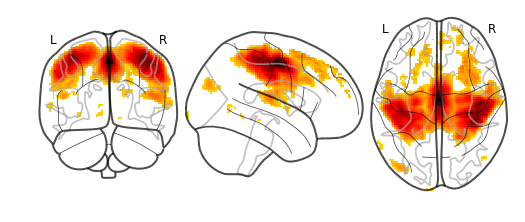

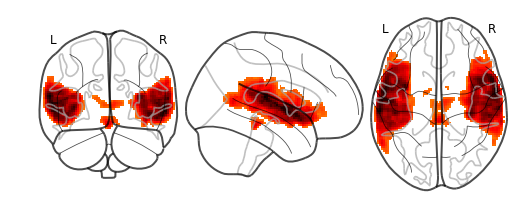

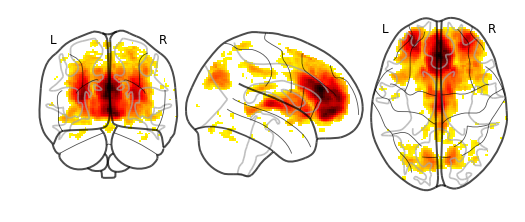

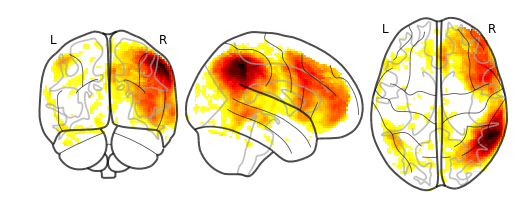

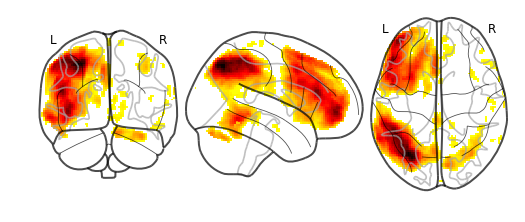

In [10]:
for img in image.iter_img(rsn):
    # img es una img 3D en memoria
    plotting.plot_glass_brain(img, threshold=3)

### Ejemplo 3:
Visualizar parcelaciones cerebrales funcionales de escala múltiple

1) descargar y buscar parcelaciones cerebrales de múltiples redes usando nilearn.datasets.fetch_atlas_basc_multiscale_2015 

In [11]:
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')

parce_1 = parcellations['scale064']
parce_2 = parcellations['scale197']
parce_3 = parcellations['scale444']

2) visualizarlas usando la función de trazado nilearn.plotting.plot_roi

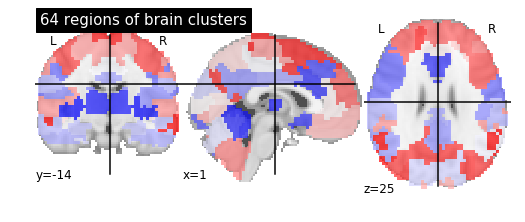

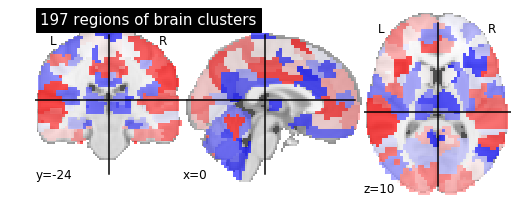

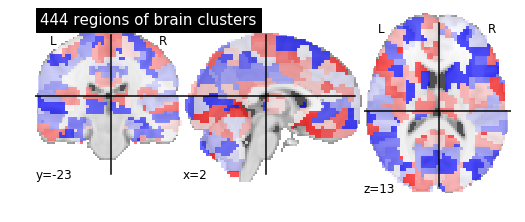

In [12]:
plotting.plot_roi(parce_1, cmap=plotting.cm.bwr,
                  title='64 regions of brain clusters')

plotting.plot_roi(parce_2, cmap=plotting.cm.bwr,
                  title='197 regions of brain clusters')

plotting.plot_roi(parce_3, cmap=plotting.cm.bwr_r,
                  title='444 regions of brain clusters')

plotting.show()

In [13]:
print(parce_1)

/home/aletrujim/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
